# Who Won the 2000 Election: Bush or Gore?

It turned out the selection process was biased towards certain months. The process was corrected for 1970. 
The data and story for the comes from :
Winston, Wayne. *Danalytics Stories: Using Data to make Good Things Happen. * Indianapolis, John Wiley & Sons, Inc., 2021.

In [22]:
#Set up the modules
import pandas as pd
import scipy.stats as stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Import the dataset
df = pd.read_excel(r'C:\Users\tsant\Documents\Data Science\Data_Stories\Chapter 03\PalmBeachRegression.xlsx', sheet_name = 'All Counties')

In [3]:
#Explore the data:
df.shape #similar to dim() in r

(67, 9)

In [4]:
df.info()
#we need to extract the first 3 columns (or alternatively delete columns 4 - 10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   county      67 non-null     object 
 1   Perot96     67 non-null     int64  
 2   Buchanan00  67 non-null     int64  
 3   Unnamed: 3  0 non-null      float64
 4   Unnamed: 4  0 non-null      float64
 5   Unnamed: 5  1 non-null      float64
 6   Unnamed: 6  2 non-null      object 
 7   Unnamed: 7  0 non-null      float64
 8   Unnamed: 8  2 non-null      object 
dtypes: float64(4), int64(2), object(3)
memory usage: 4.8+ KB


In [8]:
#Remove the scratch columns (only 1 - 3 have data)
df1 = df.iloc[:,0:3]

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   county      67 non-null     object
 1   Perot96     67 non-null     int64 
 2   Buchanan00  67 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.7+ KB


In [12]:
#Look for outliers

df1.describe()


,Perot96,Buchanan00
count,67.000000,67.000000
mean,7220.537313,260.671642
std,8972.961339,449.924215
min,316.000000,9.000000
25%,1072.500000,46.500000
50%,3739.000000,120.000000
75%,8700.000000,285.500000
max,38964.000000,3407.000000


C:\Users\tsant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Buchanan00'>

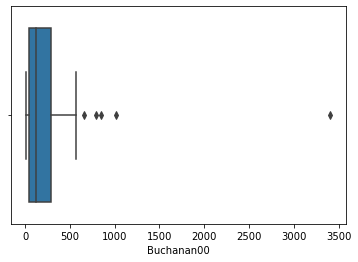

In [15]:
#Large std suggests outliers...
#and to visualize
#Boxplot
sns.boxplot(df1['Buchanan00'])

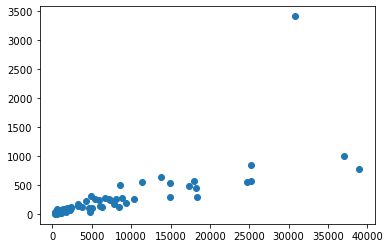

In [23]:
#Scatterplot
plt.scatter(df1['Perot96'], df1['Buchanan00'])
plt.show()

(array([54.,  9.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([   9. ,  348.8,  688.6, 1028.4, 1368.2, 1708. , 2047.8, 2387.6,
        2727.4, 3067.2, 3407. ]),
 <BarContainer object of 10 artists>)

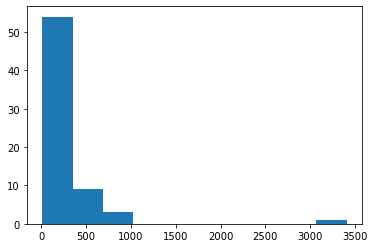

In [24]:
#Histogram
plt.hist(df1['Buchanan00'])

Clearly, Buchanan has an outlying data point in 2000

In [25]:
#Calculate z-scores for the Buchanan data
zscores = stats.zscore(df1['Buchanan00'])
print(zscores)

0     0.005214
1    -0.420266
2    -0.028377
3    -0.438181
4     0.692701
        ...   
62   -0.500884
63    0.526988
64   -0.480729
65   -0.315016
66   -0.386676
Name: Buchanan00, Length: 67, dtype: float64


I can put this array into my dataframe and I can look for the outlier, but the results are the same. Since I won't use z-scores again here, I'll just move on with my dataframe as is.

In [57]:
#Calculate some statistics to evaluate whether there are data points outside 3 standard deviations.
meanB = np.mean(df1['Buchanan00'])
stdB = np.std(df1['Buchanan00'])
tmin = meanB-(3*stdB)
tmax = meanB+(3*stdB)
#print(meanB, stdB, tmin, tmax)
#Now I need to find the index of my outlier
j = []
z = df1['Buchanan00'] #isolate the list of data
print(z)
for i, elem in enumerate(z): #when I come across the outlier,
    if elem < tmin or elem > tmax:
        j.append(i) #I want to capture the index in a list
       # print(elem)
       # print(j)
res = True in (ele < tmin or ele > tmax for ele in df1['Buchanan00'])
print(res)
df2 = df1.drop(index = j) #This will remove the rows with that outlier indeces
print(df2)
df2.info()

260.67164179104475 446.55394914200394 -1078.990205634967 1600.3334892170565
0     263
1      73
2     248
3      65
4     570
     ... 
62     37
63    496
64     46
65    120
66     88
Name: Buchanan00, Length: 67, dtype: int64
True
        county  Perot96  Buchanan00
0      Alachua     8072         263
1        Baker      667          73
2          Bay     5922         248
3     Bradford      819          65
4      Brevard    25249         570
..         ...      ...         ...
62       Union      425          37
63     Volusia    17319         496
64     Wakulla     1091          46
65      Walton     2342         120
66  Washington     1287          88

[66 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 66 entries, 0 to 66
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   county      66 non-null     object
 1   Perot96     66 non-null     int64 
 2   Buchanan00  66 non-null     int64 
dtypes: i

C:\Users\tsant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Perot96', ylabel='Buchanan00'>

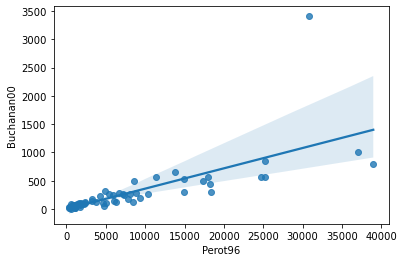

In [58]:
#Scatter plot with regression line
sns.regplot(df1['Perot96'],df1['Buchanan00'])

In [61]:
slope, intercept, r, p, std_err = stats.linregress(df1['Perot96'], df1['Buchanan00'])

print(r)

0.7162634469981759


C:\Users\tsant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Perot96', ylabel='Buchanan00'>

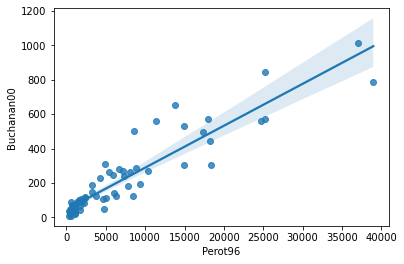

In [59]:
#Scatter plot and regression line with outlier removed
sns.regplot(df2['Perot96'],df2['Buchanan00'])

In [63]:
slope, intercept, r, p, std_err = stats.linregress(df2['Perot96'], df2['Buchanan00'])

print(r)

0.9225873717594879


These values are different than my other analyses. However, it is clear that the regression line fits much better with the outliers removed.
It seems there is a compelling argument to be made that the votes in Palm Beach County have been overestimated for Buchanan in 2000. And given the ambiguity of the Butterfly Ballot, it seems that many of the votes Buchanan received were intended for Gore. By 'many', we're talking thousands...so not *that* many. But it's an order of magnitude more than was required to push the hundreds that Bush won by over to Gore.